In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [44]:
import math

In [2]:
li = []
rejdf = pd.read_csv("/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz", index_col=None, header=0, compression='gzip')
rejdf.head()

"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        df = pd.read_csv(os.path.join(dirname, filename), index_col=None, header=0)
        li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
"""

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
rejdf.head()

In [ ]:
rejdf.describe()

In [3]:
import gc
del rejdf
gc.collect()

NameError: name 'rejdf' is not defined

In [4]:
accdf = pd.read_csv("/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz", index_col=None, header=0, compression='gzip')


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
accdf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
accdf.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [7]:
accdf.shape

(2260701, 151)

In [8]:
accdf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [9]:
loan_df = accdf[["id", "loan_amnt", "int_rate", "installment", "grade", "emp_title", "home_ownership", "annual_inc", "loan_status", "purpose", "title", "dti",
       "delinq_2yrs", "fico_range_low", "fico_range_high", "inq_last_6mths", "mths_since_last_delinq", "revol_bal", "out_prncp", "last_fico_range_high",
       "last_fico_range_low", "application_type", "annual_inc_joint", "dti_joint"]]

We can see the loan amount and installment payed

Grade represents quality of the loan, Lower grade --> Higher interests. This may depend on annual income, emp_title

Loan status tells whther loan is paid off, running, missed or default.

debt to income ration (dti) = lets say your income is 100000 and you are looking for 500,000 loan for home downpayment then dti = 100,000/500,000 = 20%. Typically this ratio is < 40% else its risky loan

FICO score is really key variable and score. High FICO score tells that they may repay the loan. ranges between 300-850.
Typically > 650 loan is provided. for < 650  subprime lending companies provide money but they charge lot of interest.
FICO takes care of lot of parameters like deliquency rates, credit card history, debts, income, your misses in payment etc.

Sometimes, Customers FICO score changes after taking loan. Frequently evaluate customer and update their score in FICO_RANGE_HIGH

Joint applicants like husban-wife can take loan together to purchase something

This is data from peer-peer lending club company. You can ask for loan money till 40K then investors can fund it. They can get more interest for risky loans. This is kind of chit funds.



In [10]:
loan_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,fico_range_high,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Fully Paid,debt_consolidation,...,679.0,1.0,30.0,2765.0,0.00,564.0,560.0,Individual,NaN,NaN
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Fully Paid,small_business,...,719.0,4.0,6.0,21470.0,0.00,699.0,695.0,Individual,NaN,NaN
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Fully Paid,home_improvement,...,699.0,0.0,NaN,7869.0,0.00,704.0,700.0,Joint App,71000.0,13.85
3,66310712,35000.0,14.85,829.90,C,Information Systems Officer,MORTGAGE,110000.0,Current,debt_consolidation,...,789.0,0.0,NaN,7802.0,15897.65,679.0,675.0,Individual,NaN,NaN
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Fully Paid,major_purchase,...,699.0,3.0,12.0,21929.0,0.00,704.0,700.0,Individual,NaN,NaN


In [11]:
loan_df["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

From plotting fico vs interest rate we can see a trend of lower interest rate for higher fico score. But if we consider many datapoints > 1000. The trend exists but the plot is noisy.

We can subsample from data and consider only some data, but we may miss some important information or a small data with some unique categorical variable. This introduces sampling bias

<AxesSubplot:xlabel='fico_range_low', ylabel='int_rate'>

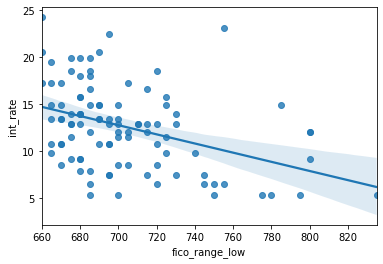

In [12]:
sns.regplot(x="fico_range_low", y="int_rate", data=loan_df[:100])

<AxesSubplot:xlabel='fico_range_low', ylabel='int_rate'>

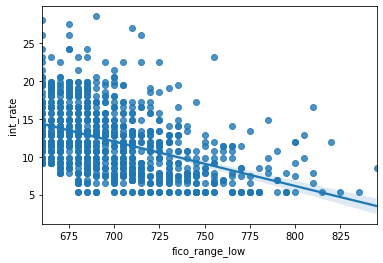

In [13]:
sns.regplot(x="fico_range_low", y="int_rate", data=loan_df[:1000])

<AxesSubplot:xlabel='fico_range_low', ylabel='int_rate'>

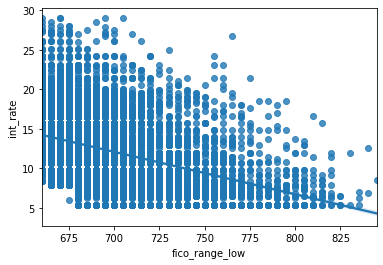

In [14]:
sns.regplot(x="fico_range_low", y="int_rate", data=loan_df[:10000])

Use only fully paid, charged off and default to reduce number of data points.

The reason is Late could be people who simply forgot to pay the installment as they missed the reminder or forgot.

Charged Off - Customer has definetly turned bad and their assets have been auctioned off and taken care.

Default on the brink of charged off, may turn bad

In [15]:
loan_df["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [22]:
loan_int_df = loan_df[loan_df["loan_status"] != "Current"]
loan_int_df = loan_int_df[loan_df["loan_status"] != "Late (31-120 days)"]
loan_int_df = loan_int_df[loan_df["loan_status"] != "In Grace Period"]
loan_int_df = loan_int_df[loan_df["loan_status"] != "Late (16-30 days)"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [23]:
loan_int_df["loan_status"].value_counts()

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [24]:
loan_int_df.groupby("loan_status").agg({"last_fico_range_high": "mean"})

,last_fico_range_high
loan_status,
Charged Off,568.443236
Default,588.875000
Does not meet the credit policy. Status:Charged Off,613.237845
Does not meet the credit policy. Status:Fully Paid,677.829477
Fully Paid,704.433473


We can see that customers with typicall high fico score tend to fully pay their loans whereas people with fico score < 600 may not pay their loans. However this may not be true in all cases some variations do exist

In [25]:
loan_int_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,fico_range_high,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Fully Paid,debt_consolidation,...,679.0,1.0,30.0,2765.0,0.0,564.0,560.0,Individual,NaN,NaN
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Fully Paid,small_business,...,719.0,4.0,6.0,21470.0,0.0,699.0,695.0,Individual,NaN,NaN
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Fully Paid,home_improvement,...,699.0,0.0,NaN,7869.0,0.0,704.0,700.0,Joint App,71000.0,13.85
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Fully Paid,major_purchase,...,699.0,3.0,12.0,21929.0,0.0,704.0,700.0,Individual,NaN,NaN
5,68426831,11950.0,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Fully Paid,debt_consolidation,...,694.0,0.0,NaN,8822.0,0.0,759.0,755.0,Individual,NaN,NaN


In [26]:
loan_int_df["loan_status"] = loan_int_df["loan_status"].replace("Charged Off", "Default")
loan_int_df["loan_status"] = loan_int_df["loan_status"].replace("Does not meet the credit policy. Status:Charged Off", "Default")
loan_int_df["loan_status"] = loan_int_df["loan_status"].replace("Does not meet the credit policy. Status:Fully Paid", "Good")
loan_int_df["loan_status"] = loan_int_df["loan_status"].replace("Fully Paid", "Good")

In [27]:
loan_int_df["loan_status"].value_counts()

Good       1078739
Default     269360
Name: loan_status, dtype: int64

In [28]:
loan_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348132 entries, 0 to 2260700
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1348132 non-null  object 
 1   loan_amnt               1348099 non-null  float64
 2   int_rate                1348099 non-null  float64
 3   installment             1348099 non-null  float64
 4   grade                   1348099 non-null  object 
 5   emp_title               1262149 non-null  object 
 6   home_ownership          1348099 non-null  object 
 7   annual_inc              1348095 non-null  float64
 8   loan_status             1348099 non-null  object 
 9   purpose                 1348099 non-null  object 
 10  title                   1331438 non-null  object 
 11  dti                     1347725 non-null  float64
 12  delinq_2yrs             1348070 non-null  float64
 13  fico_range_low          1348099 non-null  float64
 14  fi

In [30]:
loan_int_df["fico_range_low"].min(), loan_int_df["fico_range_low"].max()

(610.0, 845.0)

As we can see with column "last_fico_range_low", for some customers this is not captured and mentioned as zero.
Use a lambda functio and set it to minimum fico_range_low score 

In [39]:
loan_int_df["last_fico_range_low"].min(), loan_int_df["last_fico_range_low"].max()

(0.0, 845.0)

last_fico_range_low is usually flexible score that varies during tenure of the loan . Used to track customer after loand is given and important for credit modelling

In [40]:
loan_int_df["last_fico_range_low"] = loan_int_df.apply(lambda x: x["fico_range_low"] if x["last_fico_range_low"] == 0.0 
                                                       else x["last_fico_range_low"], axis = 1)

We can see that there are sup prime customers at fico score of 500

In [54]:
(loan_int_df["last_fico_range_low"].min(), loan_int_df["last_fico_range_low"].max())

(500.0, 845.0)

Looks like there are some null values in last_fico_range, set them to minimum 500.0

In [60]:
loan_int_df["last_fico_range_low"].isnull().sum()

0

In [59]:
loan_int_df["last_fico_range_low"] = loan_int_df["last_fico_range_low"].fillna(500.0)

The fico score is a continous score and can cause problems . Bucket it into 10s category. like 500-510, 510-520 etc

In [61]:
loan_int_df["fico_score"] = loan_int_df["last_fico_range_low"].apply(lambda x: int(math.ceil(x/10)) * 10)

In [62]:
loan_int_df.isnull().sum()

id                              0
loan_amnt                      33
int_rate                       33
installment                    33
grade                          33
emp_title                   85983
home_ownership                 33
annual_inc                     37
loan_status                    33
purpose                        33
title                       16694
dti                           407
delinq_2yrs                    62
fico_range_low                 33
fico_range_high                33
inq_last_6mths                 63
mths_since_last_delinq     679993
revol_bal                      33
out_prncp                      33
last_fico_range_high           33
last_fico_range_low             0
application_type               33
annual_inc_joint          1322326
dti_joint                 1322329
fico_score                      0
dtype: int64

drop the 33 rows with null in all important rows

In [63]:
loan_int_df = loan_int_df.dropna(axis=0, subset=['fico_range_low'])

dti and dti_joint is used a lot and needs to be fixed, employee is not used

In [64]:
loan_int_df.isnull().sum()

id                              0
loan_amnt                       0
int_rate                        0
installment                     0
grade                           0
emp_title                   85950
home_ownership                  0
annual_inc                      4
loan_status                     0
purpose                         0
title                       16661
dti                           374
delinq_2yrs                    29
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                 30
mths_since_last_delinq     679960
revol_bal                       0
out_prncp                       0
last_fico_range_high            0
last_fico_range_low             0
application_type                0
annual_inc_joint          1322293
dti_joint                 1322296
fico_score                      0
dtype: int64

In [65]:
loan_int_df[loan_int_df["dti"].isnull()]

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score
18202,66415476,20000.0,16.99,712.96,D,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,1.0,NaN,7161.0,0.0,649.0,645.0,Joint App,185000.0,5.31,650
65620,65199509,3700.0,12.59,123.94,C,NaN,MORTGAGE,0.0,Default,credit_card,...,1.0,10.0,10649.0,0.0,539.0,535.0,Joint App,40988.0,28.72,540
422321,130138254,40000.0,15.04,1387.40,C,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,0.0,6.0,5646.0,0.0,584.0,580.0,Joint App,200000.0,22.90,580
422892,130712137,21000.0,11.98,697.30,B,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,0.0,NaN,11846.0,0.0,704.0,700.0,Joint App,70000.0,8.45,700
424935,129700950,16800.0,7.34,335.37,A,NaN,MORTGAGE,0.0,Good,home_improvement,...,0.0,NaN,288.0,0.0,759.0,755.0,Joint App,130000.0,8.90,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222132,92004398,16000.0,21.49,437.28,D,NaN,MORTGAGE,0.0,Good,credit_card,...,0.0,46.0,11735.0,0.0,719.0,715.0,Joint App,125000.0,24.88,720
2228436,91834232,8750.0,15.99,307.59,C,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,0.0,NaN,14111.0,0.0,549.0,545.0,Joint App,25000.0,24.30,550
2228456,91685988,18000.0,17.99,456.99,D,Independent Consultant,MORTGAGE,0.0,Default,debt_consolidation,...,0.0,58.0,2601.0,0.0,509.0,505.0,Joint App,55000.0,25.13,510
2231449,91843866,15000.0,11.39,493.86,B,NaN,MORTGAGE,1.0,Good,debt_consolidation,...,1.0,11.0,3470.0,0.0,499.0,680.0,Joint App,150001.0,13.35,680


We can see that whenever dti is null it is because it is a joint account and not because of data loss issues. If two or more persons share over a loan then dti. Same thing is present for anual income

Similar trend is seen for joint_dti where most of the null values are due to individual applicants that can be filled with some default value. Only 3 records are genuinely null that would be removed

In [67]:
loan_int_df[loan_int_df["dti"].isnull()]["application_type"].value_counts()

Joint App    374
Name: application_type, dtype: int64

In [69]:
loan_int_df["dti_final"] = loan_int_df.apply(lambda x: x["dti_joint"] if pd.isnull(x["dti"]) else x["dti"], axis=1  )
loan_int_df["annual_inc_final"] = loan_int_df.apply(lambda x: x["annual_inc_joint"] if pd.isnull(x["annual_inc"]) else x["annual_inc"], axis=1  )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
loan_int_df.isnull().sum()

id                              0
loan_amnt                       0
int_rate                        0
installment                     0
grade                           0
emp_title                   85946
home_ownership                  0
annual_inc                      0
loan_status                     0
purpose                         0
title                       16661
dti                           374
delinq_2yrs                    25
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                 26
mths_since_last_delinq     679956
revol_bal                       0
out_prncp                       0
last_fico_range_high            0
last_fico_range_low             0
application_type                0
annual_inc_joint          1322289
dti_joint                 1322292
fico_score                      0
dti_final                       0
annual_inc_final                0
dtype: int64

In [71]:
loan_int_df = loan_int_df.dropna(axis=0, subset=['annual_inc_final'])

In [73]:
loan_int_df[loan_int_df["dti_joint"].isnull()]["application_type"].value_counts()

Individual    1322289
Joint App           3
Name: application_type, dtype: int64

In [74]:
loan_int_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score,dti_final,annual_inc_final
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,...,2765.0,0.0,564.0,560.0,Individual,NaN,NaN,560,5.91,55000.0
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,...,21470.0,0.0,699.0,695.0,Individual,NaN,NaN,700,16.06,65000.0
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,...,7869.0,0.0,704.0,700.0,Joint App,71000.0,13.85,700,10.78,63000.0
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,...,21929.0,0.0,704.0,700.0,Individual,NaN,NaN,700,25.37,104433.0
5,68426831,11950.0,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,...,8822.0,0.0,759.0,755.0,Individual,NaN,NaN,760,10.20,34000.0


In [75]:
loan_int_df["fico_score"].value_counts().sort_index()

500     7663
510    17659
520    20337
530    22525
540    25705
550    26620
560    26562
570    26376
580    25611
590    24758
600    24265
610    24909
620    26060
630    28213
640    32641
650    39723
660    55850
670    72402
680    81680
690    87765
700    88631
710    87224
720    82946
730    72441
740    60935
750    51142
760    43834
770    38607
780    35022
790    29475
800    23787
810    17955
820    11240
830     5660
840     1617
850      255
Name: fico_score, dtype: int64

In [87]:
fico_df = loan_int_df["fico_score"].value_counts().sort_index()

defaulted customer fico score distribution

In [79]:
loan_int_df[loan_int_df["loan_status"] == "Default"]["fico_score"].value_counts().sort_index()

500     6494
510    14624
520    16504
530    17844
540    19599
550    19710
560    19007
570    17940
580    16433
590    14666
600    12941
610    11674
620    10311
630     8932
640     7575
650     6108
660     9108
670    11046
680     8372
690     6147
700     4295
710     3130
720     2179
730     1380
740      918
750      661
760      512
770      335
780      296
790      211
800      163
810      110
820       64
830       42
840       21
850        8
Name: fico_score, dtype: int64

In [83]:
fico_default_df = loan_int_df[loan_int_df["loan_status"] == "Default"]["fico_score"].value_counts().sort_index()

segment customer based on fico score

In [81]:
loan_int_df[["fico_score", "dti_final", "loan_amnt", "annual_inc"]].groupby("fico_score").agg({"dti_final": "mean", "loan_amnt": "mean", "annual_inc": "median"})

,dti_final,loan_amnt,annual_inc
fico_score,,,
500,18.585422,13636.297795,56000.0
510,19.062190,13797.041169,56160.0
520,19.329466,14025.865418,58000.0
530,19.497190,14397.295228,60000.0
540,19.977028,14576.474421,60000.0
550,19.970402,14730.694966,60000.0
560,20.042466,14783.067917,60233.0
570,19.972105,14789.444002,61000.0
580,19.881493,14735.069892,61000.0


In [84]:
metrics1 = loan_int_df[["fico_score", "dti_final", "loan_amnt", "annual_inc"]].groupby("fico_score").agg({"dti_final": "mean", "loan_amnt": "mean", "annual_inc": "median"})

In [82]:
loan_int_df[["fico_score", "annual_inc", "int_rate"]].groupby("fico_score").mean()

,annual_inc,int_rate
fico_score,,
500,64848.026484,15.739192
510,65413.404373,15.768737
520,68056.159686,15.571856
530,68586.213829,15.717382
540,69625.667946,15.570908
550,70673.428911,15.399204
560,71618.457676,15.324792
570,72053.843513,15.197046
580,72426.640181,15.191224


In [85]:
metrics2 = loan_int_df[["fico_score", "annual_inc", "int_rate"]].groupby("fico_score").mean()

concatenate above two segmentations metrics, defaultficoscore dataframe onto fico_score dataframe . There are metrics based on fico score

In [88]:
metrics_df = pd.concat([fico_df, fico_default_df,metrics1, metrics2], ignore_index=True, axis=1)

In [89]:
metrics_df.head()

,0,1,2,3,4,5,6
500,7663,6494,18.585422,13636.297795,56000.0,64848.026484,15.739192
510,17659,14624,19.062190,13797.041169,56160.0,65413.404373,15.768737
520,20337,16504,19.329466,14025.865418,58000.0,68056.159686,15.571856
530,22525,17844,19.497190,14397.295228,60000.0,68586.213829,15.717382
540,25705,19599,19.977028,14576.474421,60000.0,69625.667946,15.570908


the fico score as index now becomes normal columns

In [90]:
metrics_df = metrics_df.reset_index()

In [91]:
metrics_df.head()

,index,0,1,2,3,4,5,6
0,500,7663,6494,18.585422,13636.297795,56000.0,64848.026484,15.739192
1,510,17659,14624,19.062190,13797.041169,56160.0,65413.404373,15.768737
2,520,20337,16504,19.329466,14025.865418,58000.0,68056.159686,15.571856
3,530,22525,17844,19.497190,14397.295228,60000.0,68586.213829,15.717382
4,540,25705,19599,19.977028,14576.474421,60000.0,69625.667946,15.570908


In [92]:
metrics_df.columns = ['fico_score','loan_total','default_total','dti','avg_loan_amnt','median_annual_inc','avg_annual_inc','int_rate']

In [93]:
metrics_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate
0,500,7663,6494,18.585422,13636.297795,56000.0,64848.026484,15.739192
1,510,17659,14624,19.062190,13797.041169,56160.0,65413.404373,15.768737
2,520,20337,16504,19.329466,14025.865418,58000.0,68056.159686,15.571856
3,530,22525,17844,19.497190,14397.295228,60000.0,68586.213829,15.717382
4,540,25705,19599,19.977028,14576.474421,60000.0,69625.667946,15.570908


Out of all loan how much is default and what is the default rate inside each bucket.
This is how metrics are created to perform statistics like correlation

In [94]:
metrics_df['default_rate']=(metrics_df.default_total/metrics_df.default_total.sum())*100
metrics_df['actual_default_rate']=(metrics_df.default_total/metrics_df.loan_total.sum())*100

In [95]:
metrics_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,7663,6494,18.585422,13636.297795,56000.0,64848.026484,15.739192,2.410900,0.481717
1,510,17659,14624,19.062190,13797.041169,56160.0,65413.404373,15.768737,5.429165,1.084790
2,520,20337,16504,19.329466,14025.865418,58000.0,68056.159686,15.571856,6.127116,1.224246
3,530,22525,17844,19.497190,14397.295228,60000.0,68586.213829,15.717382,6.624592,1.323646
4,540,25705,19599,19.977028,14576.474421,60000.0,69625.667946,15.570908,7.276136,1.453829


In [96]:
metrics_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.082599,-0.899864,-0.913184,0.681977,0.926061,0.935190,-0.965569,-0.899864,-0.899864
loan_total,0.082599,1.000000,-0.161553,0.184583,-0.459978,-0.102228,-0.053503,0.109123,-0.161553,-0.161553
default_total,-0.899864,-0.161553,1.000000,0.861428,-0.486049,-0.776419,-0.780795,0.869707,1.000000,1.000000
dti,-0.913184,0.184583,0.861428,1.000000,-0.798395,-0.918152,-0.902461,0.960064,0.861428,0.861428
avg_loan_amnt,0.681977,-0.459978,-0.486049,-0.798395,1.000000,0.855551,0.831582,-0.806661,-0.486049,-0.486049
median_annual_inc,0.926061,-0.102228,-0.776419,-0.918152,0.855551,1.000000,0.993147,-0.960268,-0.776419,-0.776419
avg_annual_inc,0.935190,-0.053503,-0.780795,-0.902461,0.831582,0.993147,1.000000,-0.950403,-0.780795,-0.780795
int_rate,-0.965569,0.109123,0.869707,0.960064,-0.806661,-0.960268,-0.950403,1.000000,0.869707,0.869707
default_rate,-0.899864,-0.161553,1.000000,0.861428,-0.486049,-0.776419,-0.780795,0.869707,1.000000,1.000000
actual_default_rate,-0.899864,-0.161553,1.000000,0.861428,-0.486049,-0.776419,-0.780795,0.869707,1.000000,1.000000
